# **Car-Engine-Health-Prediction-Project-Group3-Karu**

## **1. Business Understanding**<hr>

### **Problem Statement**

There have been recent concerns in engine reliability and also the reliability of cars in general. Some attribute this to tighter emissions regulations leading car manufactures to trade long- term reliability for lower emissions. We have identified a need for a tool to help drivers judge the status of the engine specifically given engine data such as oil pressure, temperature etc.

### **Objectives**

* Find the best model that predicts engine faliure.
* Try to minimise false positives since they are costlier.

**Model Objectives**
* Healthy-Class Precision - 0.80
* Unhealthy-Class Recall - 0.80

<br><br>

## **2. Data Understanding**<hr>

### **2.1. Imports & Data Loading**

In [36]:
# Data Loading and Manipulation
import numpy as np
import pandas as pd

# Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# model Analysis and Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay,
    make_scorer
)

# Miscelleneaous
import zipfile

In [2]:
#Data file paths
train_path = "./data/train.csv"
test_path = "./data/test.csv"
raw_path = "./data/raw_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
raw_df = pd.read_csv(raw_path)

In [3]:
raw_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [4]:
train_df.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,496,4.706240,5.249898,3.803385,75.033607,70.542095,0
1,836,3.960027,4.928546,3.705357,74.395016,84.098307,1
2,623,3.055244,9.494612,2.084725,76.865701,72.927688,0
3,675,2.785797,5.463947,1.649817,75.397279,82.907453,1
4,1412,2.816022,4.001410,1.921522,83.246013,71.176927,1


In [5]:
test_df.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,634,2.611260,10.453517,2.771041,75.863640,79.245834,1
1,856,4.043840,5.829366,2.460446,73.860133,71.047078,1
2,814,4.073486,5.257120,1.866571,81.840070,76.715591,0
3,379,2.724639,4.712955,1.981593,77.092260,76.106727,1
4,868,2.672809,5.273917,1.905387,78.475478,72.088361,0


### **2.2. Cleaning**

#### *raw_df*

In [6]:
raw_df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

In [7]:
raw_df.duplicated().sum()

np.int64(0)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [9]:
raw_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


#### *test_df*

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_rpm        3907 non-null   int64  
 1   lub_oil_pressure  3907 non-null   float64
 2   fuel_pressure     3907 non-null   float64
 3   coolant_pressure  3907 non-null   float64
 4   lub_oil_temp      3907 non-null   float64
 5   coolant_temp      3907 non-null   float64
 6   engine_condition  3907 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 213.8 KB


In [11]:
test_df.duplicated().sum()

np.int64(0)

This dataset is clean

#### *train_df*

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15628 entries, 0 to 15627
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_rpm        15628 non-null  int64  
 1   lub_oil_pressure  15628 non-null  float64
 2   fuel_pressure     15628 non-null  float64
 3   coolant_pressure  15628 non-null  float64
 4   lub_oil_temp      15628 non-null  float64
 5   coolant_temp      15628 non-null  float64
 6   engine_condition  15628 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 854.8 KB


In [13]:
train_df.duplicated().sum()

np.int64(0)

This dataset is clean

### **2.3. Visulizations & Analysis**

In [14]:
raw_df['Engine Condition'].value_counts()
raw_df['Engine Condition'].value_counts(normalize=True)

Engine Condition
1    0.630509
0    0.369491
Name: proportion, dtype: float64

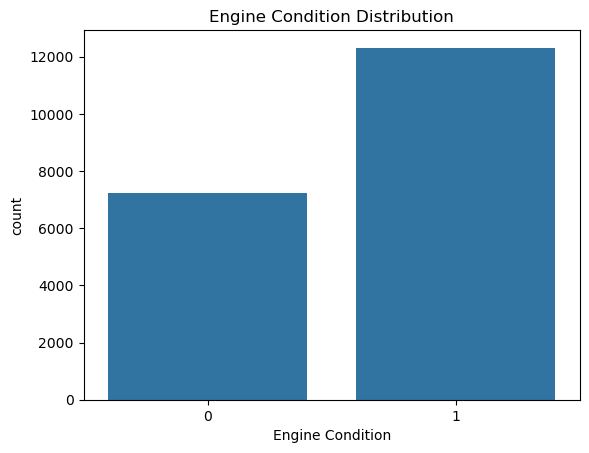

In [15]:
sns.countplot(x="Engine Condition", data=raw_df)
plt.title("Engine Condition Distribution")
plt.show()

There is a slight class imbalance towards the healthy engines.

Let's check for outliers and distribution of numerical features.

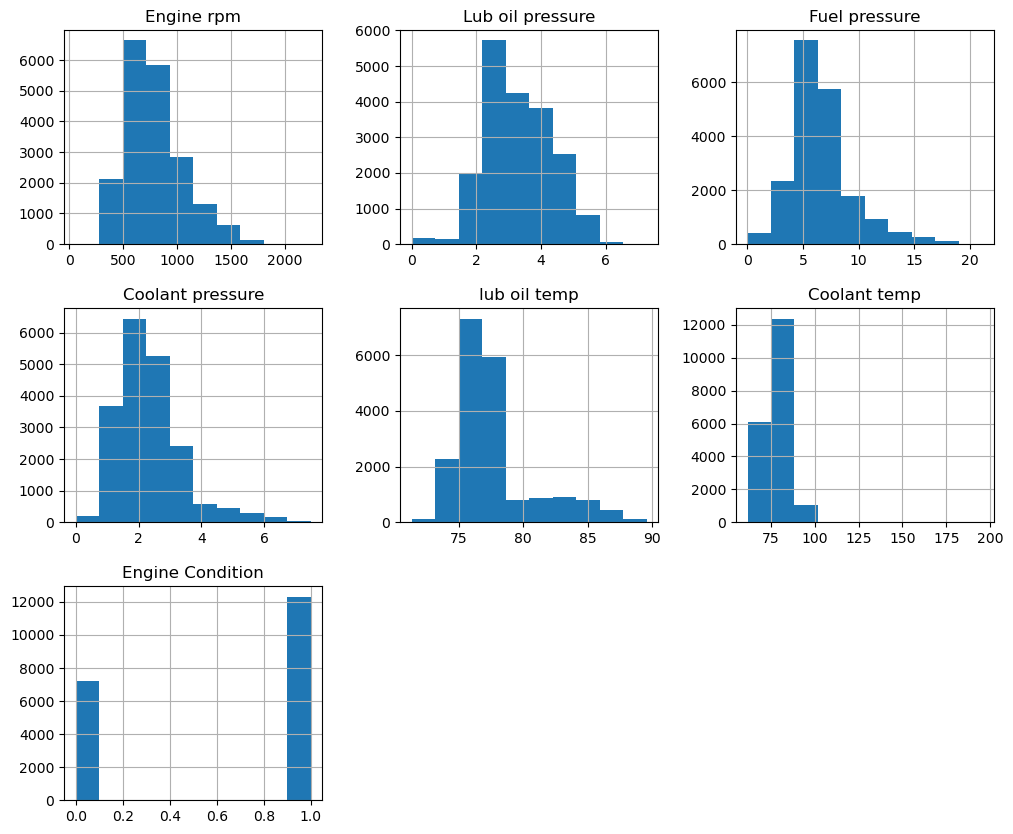

In [16]:
raw_df.hist(figsize=(12,10))
plt.show()

##### **Engine RPM:**<br>
* Most values are concentrated roughly between 500 – 1200 rpm

* Slight right skew (few high rpm values up to ~2000)

* No extreme abnormal spikes

* Engine operates mostly in a normal operating band. High RPM values may correspond to high load or stress conditions.

##### **Lubrication Oil Pressure**<br>
* Most values between 2 – 4

* Slight right skew

* Few low-pressure values near 0

* Low oil pressure can be a strong indicator of engine failure. You should later check oil pressure vs Engine Condition using boxplots

##### **Fuel Pressure**<br>
* Concentrated around 4 – 8

* Some extreme values up to 20

* Fue*l pressure shows some outliers.

##### **Coolant Pressure**<br>
* Most values between 1 – 4

* Slight skew

* Some higher outliers

* Coolant pressure distribution seems reasonable. Higher coolant pressure might correlate with overheating events.

##### **Lub Oil Temperature**<br>
* Concentrated around 75 – 82°C

* Slight right skew

* Some values near 90°C

* Engine oil temperature appears stable for most samples. High oil temperatures could be associated with failure events.

##### **Coolant Temperature**<br>
* Most values between 70 – 100°C

* Some extreme outliers up to 200°C

* 200°C is unusually high for coolant temperature.

##### **Engine Condition (Target Variable)**<br>
Two bars:

* 0 _No Failure

* 1 _Failure

* 1 appears larger than 0 but not extremely imbalanced

* Dataset seems moderately imbalanced.

Checking for correlation between columns

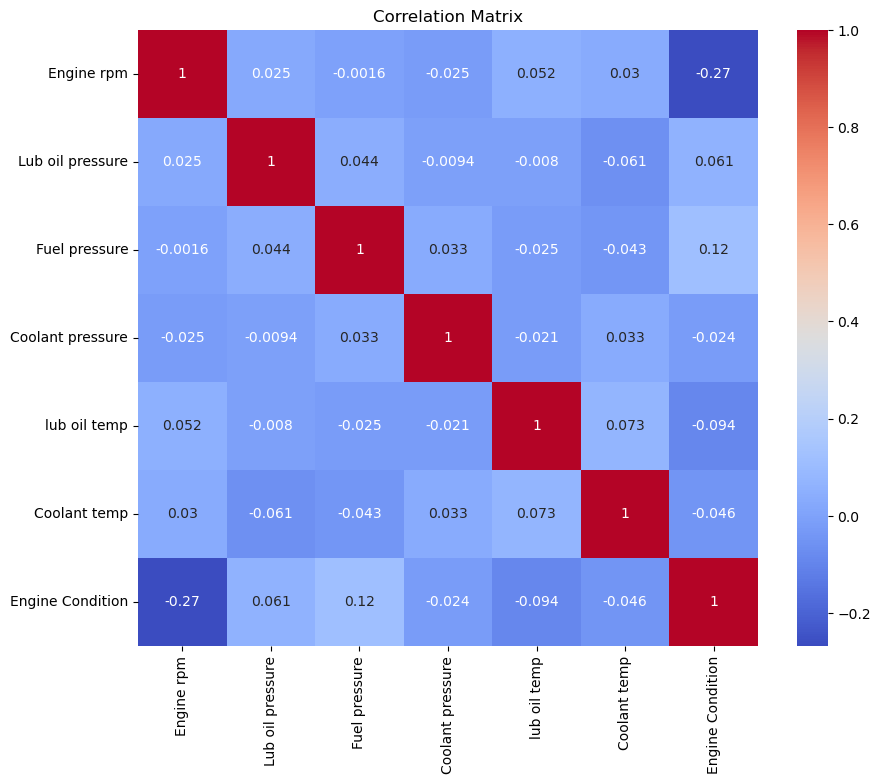

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(raw_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows generally weak linear relationships between the features and **Engine Condition**. The strongest relationship is a moderate negative correlation with **Engine rpm** (-0.268), suggesting RPM has the most noticeable linear influence on engine condition. **Fuel pressure** shows a small positive correlation (0.116), while the remaining variables have very weak correlations close to zero, indicating limited linear predictive power individually. Additionally, feature-to-feature correlations are low, meaning there is little multicollinearity in the dataset. Overall, the target does not appear to be strongly linearly driven by any single variable, suggesting that non-linear modeling or feature engineering may be important.


<br>

## **3. Data Preparation**<hr>

Here we prepare data for training

In [18]:
X_train = train_df.drop(columns=["engine_condition"])
y_train = train_df["engine_condition"]

X_test = test_df.drop(columns=["engine_condition"])
y_test = test_df["engine_condition"]

*scaled data*

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<br>

## **4. Modelling**<hr> 

First lets define a function for analyzing our models

In [20]:
def analyze_model(name, model, Xtest=X_test, ytest=y_test):
    ypred = model.predict(Xtest)
    line = "--------------------"
    print(f"{line} {name} model analytics {line}\n")
    cm = confusion_matrix(ytest, ypred)
    print(f"accuracy score = {accuracy_score(ytest, ypred)}")
    print(f"recallscore = {recall_score(ytest, ypred)}")
    print(f"f1 score = {f1_score(ytest, ypred)}")
    print(f"confusion matrix = \n{cm}")
    print(classification_report(ytest, ypred))
    ConfusionMatrixDisplay.from_estimator(model, Xtest, ytest, normalize='true', cmap='Blues', display_labels=["Unhealthy", "Healthy"])

### **4.1. Logistic Regression**

In [21]:
base = LogisticRegression(random_state=42)
base = base.fit(X_train, y_train)

c:\Users\USER\anaconda3\envs\ben\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-------------------- base model analytics --------------------

accuracy score = 0.6613770156130023
recallscore = 0.8781973203410475
f1 score = 0.7657992565055762
confusion matrix = 
[[ 421 1023]
 [ 300 2163]]
              precision    recall  f1-score   support

           0       0.58      0.29      0.39      1444
           1       0.68      0.88      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.58      0.58      3907
weighted avg       0.64      0.66      0.63      3907



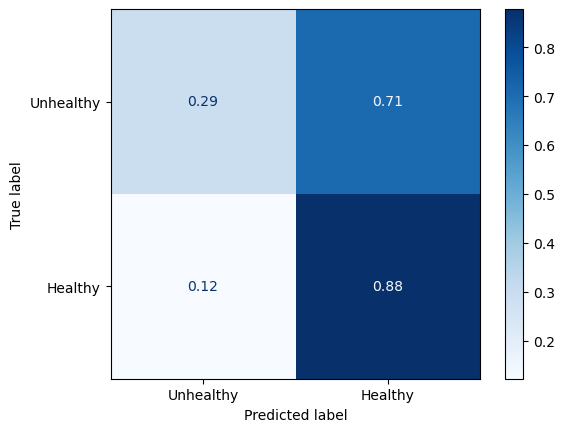

In [22]:
analyze_model("base", base)

* Bad recall for the unhealthy class
* Almost Good precision for the healthy class

-------------------- Enhanced base model analytics --------------------

accuracy score = 0.6519068338878935
recallscore = 0.6853430775477061
f1 score = 0.7128378378378378
confusion matrix = 
[[ 859  585]
 [ 775 1688]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1444
           1       0.74      0.69      0.71      2463

    accuracy                           0.65      3907
   macro avg       0.63      0.64      0.64      3907
weighted avg       0.66      0.65      0.66      3907



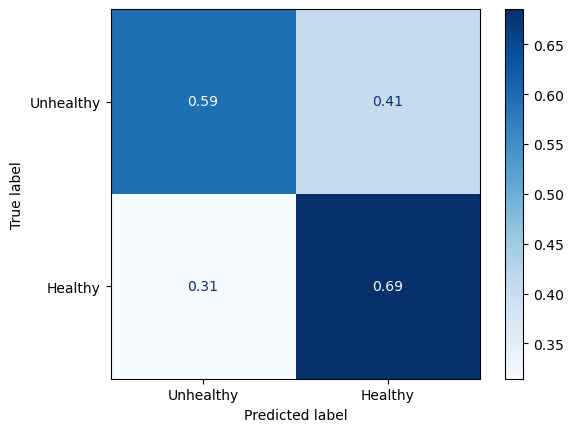

In [23]:
en_base = LogisticRegression(max_iter=1000, class_weight="balanced", random_state = 42)
en_base.fit(X_train,y_train)
analyze_model("Enhanced base", en_base)

* Above recall for the unhealthy class
* Good precision for the healthy class

-------------------- pipeline log model analytics --------------------

accuracy score = 0.6519068338878935
recallscore = 0.6853430775477061
f1 score = 0.7128378378378378
confusion matrix = 
[[ 859  585]
 [ 775 1688]]
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1444
           1       0.74      0.69      0.71      2463

    accuracy                           0.65      3907
   macro avg       0.63      0.64      0.64      3907
weighted avg       0.66      0.65      0.66      3907



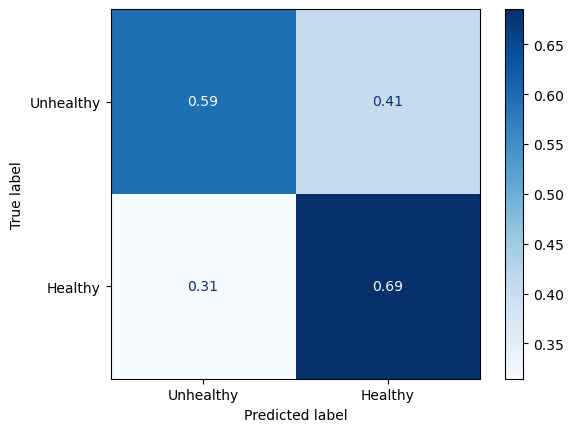

In [24]:
# Using scaled data with logistic regression
pipe_log = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", LogisticRegression(class_weight="balanced", max_iter=2000, random_state = 42))
])

pipe_log.fit(X_train, y_train)

analyze_model("pipeline log", model=pipe_log)

Same as before

-------------------- Grid log_reg model analytics --------------------

accuracy score = 0.6516508830304582
recallscore = 0.6845310596833131
f1 score = 0.712444538347771
confusion matrix = 
[[ 860  584]
 [ 777 1686]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56      1444
           1       0.74      0.68      0.71      2463

    accuracy                           0.65      3907
   macro avg       0.63      0.64      0.64      3907
weighted avg       0.66      0.65      0.66      3907



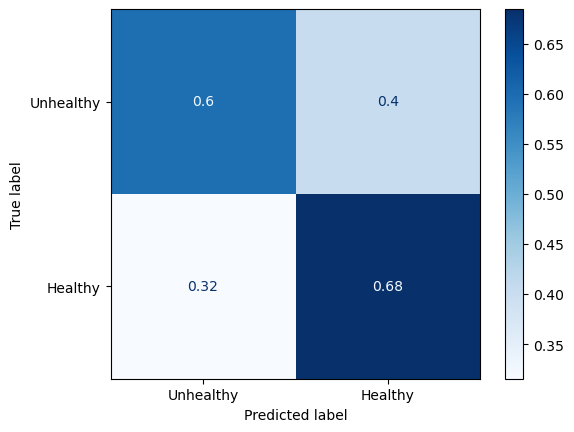

In [25]:
# Trying grid search on logistic regression

log_param_grid = {
     "C": [ 43,44, 45, 46, 48],
   
    "max_iter": [150, 200, 250 ]
}

recall_unhealthy = make_scorer(recall_score, pos_label=0)

grid_log = GridSearchCV(
    LogisticRegression(penalty="l1", solver="liblinear", class_weight="balanced", random_state=42),
    log_param_grid,
    scoring=recall_unhealthy,
    cv=5,
    n_jobs=-1
)

grid_log.fit(X_train, y_train)

analyze_model("Grid log_reg", grid_log)

Not much improvement

<br>

### **4.2. SVM**

-------------------- SVM model analytics --------------------

accuracy score = 0.6163296647043768
recallscore = 0.587088915956151
f1 score = 0.6586199043498064
confusion matrix = 
[[ 962  482]
 [1017 1446]]
              precision    recall  f1-score   support

           0       0.49      0.67      0.56      1444
           1       0.75      0.59      0.66      2463

    accuracy                           0.62      3907
   macro avg       0.62      0.63      0.61      3907
weighted avg       0.65      0.62      0.62      3907



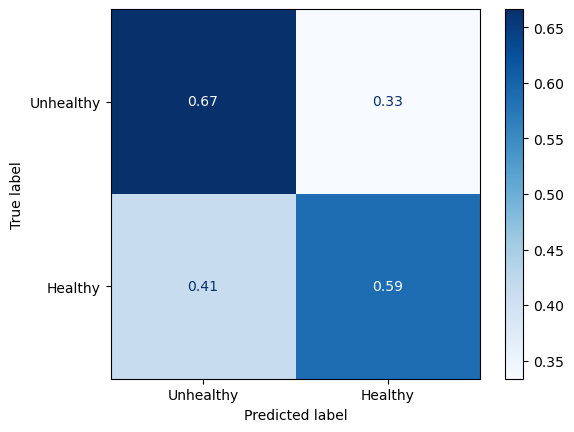

In [26]:
sv_model = svm.SVC(class_weight="balanced", random_state=42)
sv_model.fit(X_train, y_train)

analyze_model("SVM", sv_model)

* Above average recall for the unhealthy class
* Above average precision for the healthy class

-------------------- pipeline svm model analytics --------------------

accuracy score = 0.6416687995904786
recallscore = 0.6183516037352822
f1 score = 0.6851102114260009
confusion matrix = 
[[ 984  460]
 [ 940 1523]]
              precision    recall  f1-score   support

           0       0.51      0.68      0.58      1444
           1       0.77      0.62      0.69      2463

    accuracy                           0.64      3907
   macro avg       0.64      0.65      0.63      3907
weighted avg       0.67      0.64      0.65      3907



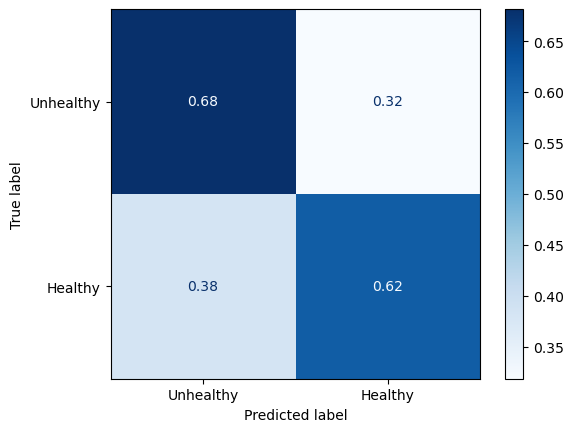

In [27]:
pipe_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", svm.SVC(class_weight="balanced", random_state=42))
])

pipe_svm.fit(X_train, y_train)

analyze_model("pipeline svm", model=pipe_svm)


-------------------- Grid SVC model analytics --------------------

accuracy score = 0.6595853596109547
recallscore = 0.758830694275274
f1 score = 0.7375690607734806
confusion matrix = 
[[ 708  736]
 [ 594 1869]]
              precision    recall  f1-score   support

           0       0.54      0.49      0.52      1444
           1       0.72      0.76      0.74      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.62      0.63      3907
weighted avg       0.65      0.66      0.66      3907



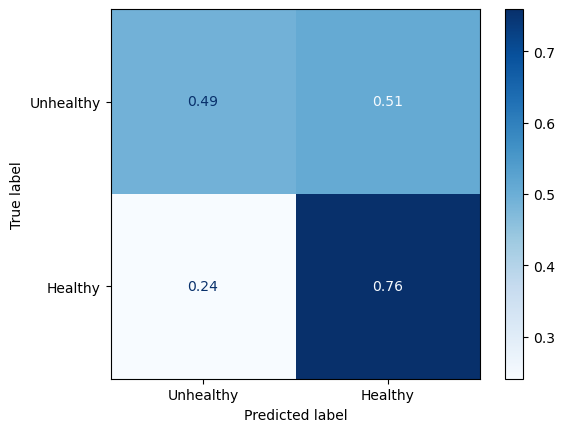

In [32]:
svc_param_grid = {
    'estimator__C': [0.1, 1, 10, 100],
    'estimator__gamma': [0.001, 0.01, 0.1, 1],
}

svc_grid_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", svm.SVC(class_weight="balanced", random_state=42))
    ]
)
grid_svc = GridSearchCV(
    svc_grid_pipe,
    svc_param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_svc.fit(X_train, y_train)

analyze_model("Grid SVC", grid_svc)

#### **4.3 Decision Trees**

-------------------- Tree model analytics --------------------

accuracy score = 0.5794727412336831
recallscore = 0.6760048721071864
f1 score = 0.6696159260004022
confusion matrix = 
[[ 599  845]
 [ 798 1665]]
              precision    recall  f1-score   support

           0       0.43      0.41      0.42      1444
           1       0.66      0.68      0.67      2463

    accuracy                           0.58      3907
   macro avg       0.55      0.55      0.55      3907
weighted avg       0.58      0.58      0.58      3907



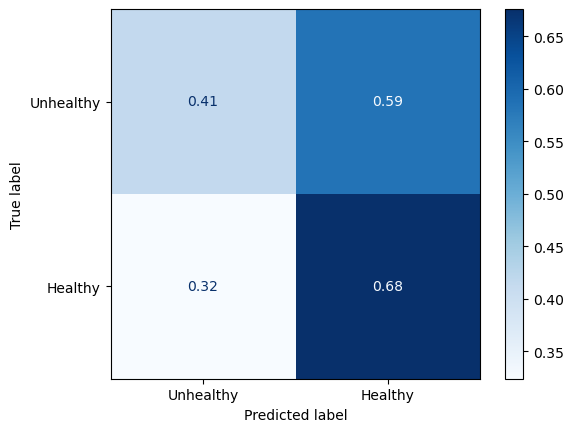

In [33]:
tree = DecisionTreeClassifier(class_weight="balanced", random_state = 42)
tree.fit(X_train,y_train)

analyze_model("Tree", tree)

-------------------- pipeline tree model analytics --------------------

accuracy score = 0.5797286920911185
recallscore = 0.6764108810393828
f1 score = 0.6698833936469643
confusion matrix = 
[[ 599  845]
 [ 797 1666]]
              precision    recall  f1-score   support

           0       0.43      0.41      0.42      1444
           1       0.66      0.68      0.67      2463

    accuracy                           0.58      3907
   macro avg       0.55      0.55      0.55      3907
weighted avg       0.58      0.58      0.58      3907



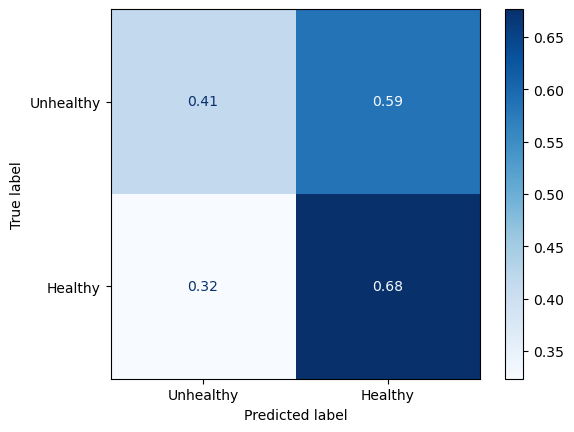

In [34]:
pipe_tree = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", DecisionTreeClassifier(class_weight="balanced", random_state = 42))
])

pipe_tree.fit(X_train, y_train)

analyze_model("pipeline tree", model=pipe_tree)

-------------------- Grid Decision Trees model analytics --------------------

accuracy score = 0.6347581264397236
recallscore = 0.681282988225741
f1 score = 0.7016516830441146
confusion matrix = 
[[ 802  642]
 [ 785 1678]]
              precision    recall  f1-score   support

           0       0.51      0.56      0.53      1444
           1       0.72      0.68      0.70      2463

    accuracy                           0.63      3907
   macro avg       0.61      0.62      0.62      3907
weighted avg       0.64      0.63      0.64      3907



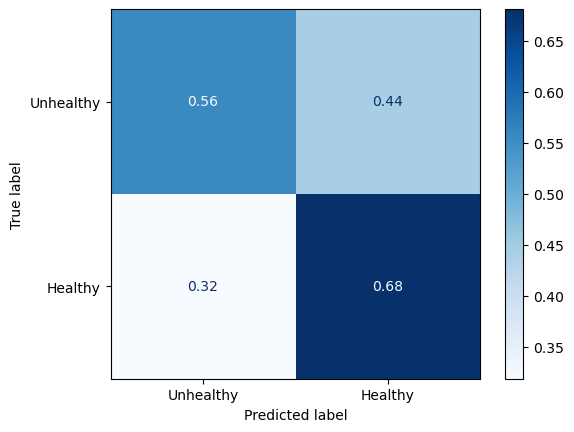

In [35]:
dt_param_grid = {
    'estimator__max_depth': [ 4, 5, 6, 8, 10, 15],
    'estimator__min_samples_split': [0.15,0.25, 0.3,0.4, 0.45, 0.5],
    'estimator__min_samples_leaf': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8,1]
}

pipe_tree = Pipeline([
    ("scaler", StandardScaler()),
    ("estimator", DecisionTreeClassifier(class_weight="balanced", random_state = 42))
])
grid_dt = GridSearchCV(
    pipe_tree,
    dt_param_grid,
    #scoring=recall_unhealthy,
    cv=5,
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

analyze_model("Grid Decision Trees", grid_dt)

### **4.4. Ensemble Methods**

-------------------- Random Forest model analytics --------------------

accuracy score = 0.6496032761709751
recallscore = 0.8181079983759643
f1 score = 0.7464345249120208
confusion matrix = 
[[ 523  921]
 [ 448 2015]]
              precision    recall  f1-score   support

           0       0.54      0.36      0.43      1444
           1       0.69      0.82      0.75      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.59      0.59      3907
weighted avg       0.63      0.65      0.63      3907



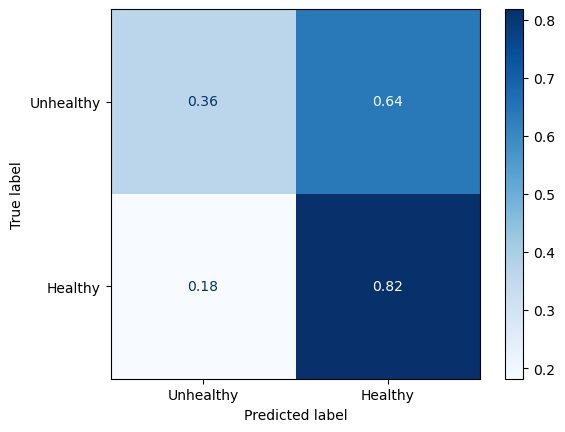

In [ ]:
pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("estimator", RandomForestClassifier(class_weight="balanced",random_state=42))
])

pipe_rf.fit(X_train,y_train)
analyze_model("Random Forest", pipe_rf)

-------------------- XGBoost Base model analytics --------------------

accuracy score = 0.635014077297159
recallscore = 0.6630125862768981
f1 score = 0.696078431372549
confusion matrix = 
[[ 848  596]
 [ 830 1633]]
              precision    recall  f1-score   support

           0       0.51      0.59      0.54      1444
           1       0.73      0.66      0.70      2463

    accuracy                           0.64      3907
   macro avg       0.62      0.63      0.62      3907
weighted avg       0.65      0.64      0.64      3907



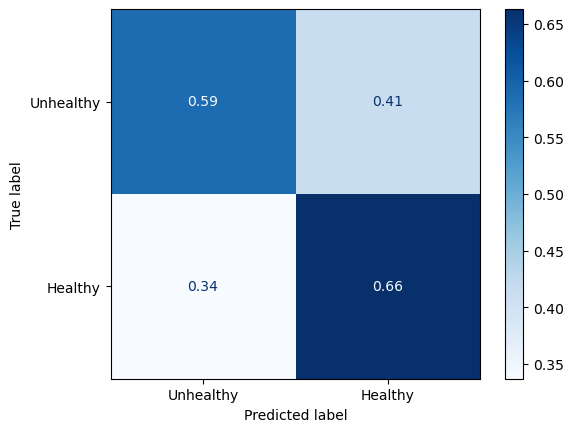

In [42]:
xgb_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("estimator", XGBClassifier(
        scale_pos_weight = len(y_train[y_train==0])/ len(y_train[y_train==1]),
        eval_metric='logloss',
        random_state=42 
    ))
])# does not need scaling

xgb_pipe.fit(X_train, y_train)
analyze_model("XGBoost Base", xgb_pipe)

-------------------- XGB GridSearch model analytics --------------------

accuracy score = 0.6137701561300231
recallscore = 0.6715387738530247
f1 score = 0.6867344820427652
confusion matrix = 
[[ 744  700]
 [ 809 1654]]
              precision    recall  f1-score   support

           0       0.48      0.52      0.50      1444
           1       0.70      0.67      0.69      2463

    accuracy                           0.61      3907
   macro avg       0.59      0.59      0.59      3907
weighted avg       0.62      0.61      0.62      3907



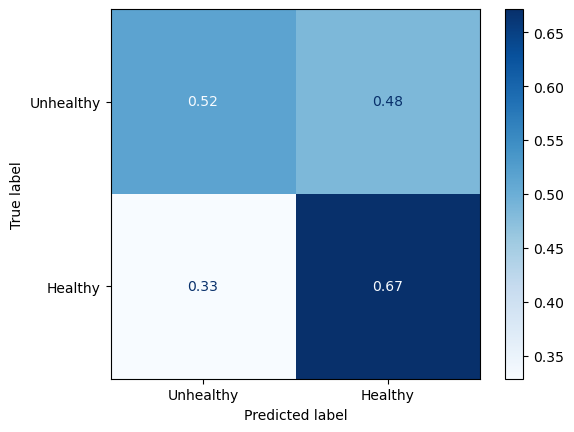

In [44]:
param_grid_xgb = {
    'estimator__n_estimators': [100, 200],
    'estimator__max_depth': [3,5,7],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__subsample': [0.8, 1.0]
}


grid_xgb = GridSearchCV(
    xgb_pipe,
    param_grid_xgb,
    cv=5,
    scoring='recall',
    n_jobs=-1
) 

grid_xgb.fit(X_train, y_train)

analyze_model("XGB GridSearch", grid_xgb)